# Tutorial 1
## Frames, Rotations and Translations


In [1]:
import sympy as s 
from sympy.abc import x
import math 
import numpy as np
import matplotlib.pyplot as plt 
import plot_utils as pu # Make sure that your path is in the same folder! 
import importlib
import time
importlib.reload(pu)

from sympy.physics.vector import dynamicsymbols, init_vprinting # our symbols will be dynamic ones :) 
init_vprinting() # start newton notation

%matplotlib widget

1. Create the homogeneous transformations $H_w^0$, $H_0^1$, $H_w^1$, $H_1^2$, $H_w^2$,$H_2^3$, $H_w^3$. Have a look at the hashtags and replace accordingly :) 

In [2]:
cos = lambda deg : np.cos(np.radians(deg))
sin = lambda deg : np.sin(np.radians(deg))

rot_x = lambda a: np.array([[ 1, 0, 0], 
                 [ 0, cos(a), -sin(a)],
                 [ 0, sin(a), cos(a)]]) 
rot_y = lambda b: np.array([[ cos(b), 0, sin(b)], 
                [ 0, 1, 0],
                [ -sin(b), 0, cos(b)]]) 
rot_z = lambda c: np.array([[ cos(c), -sin(c), 0], 
                [ sin(c), cos(c), 0],
                [ 0, 0, 0]])

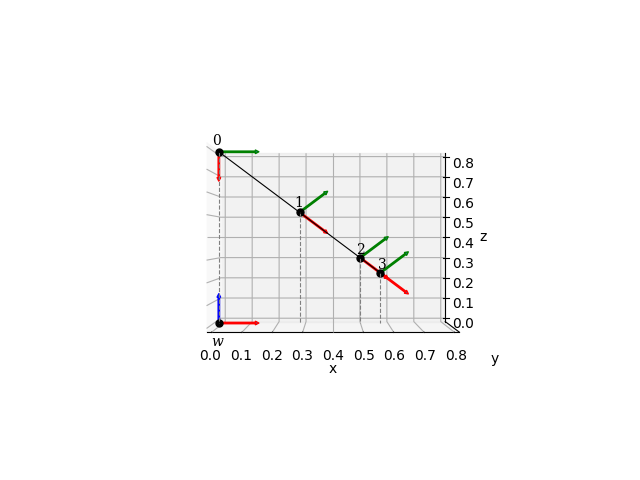

In [3]:
L1_ = 0.4#Distance from your shoulder to your elbow [m]
L2_ =0.3 #Distance from your elbow to your wrist [m]
L3_ =0.1 #Distance from your wrist to the middle of your palm [m]
q0__ = -90.0
q1__= 45.0
q2__= 0.0
q3__= 0.0
H_temp = np.array([[0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 1.0]])

#------------- From world frame to joint 0----------------------
H0_w = H_temp.copy()
tvec_0_w = np.array([[0.0], 
                    [0.0], 
                    [L1_+L2_+L3_]])

rot_0_w = rot_x(90)@rot_z(q0__)
H0_w[:3,:] = np.append(rot_0_w, tvec_0_w, axis=1)[:,:]

#------------- From joint 1 frame to joint 0----------------------

H1_0 = H_temp.copy()
tvec_1_0 = np.array([[L1_*cos(q1__)],[L1_*sin(q1__)],[0]])
rot_1_0 = rot_z(q1__)
H1_0[:3,:] = np.append(rot_1_0, tvec_1_0, axis=1)[:,:]

H1_w = np.matmul(H0_w,H1_0)

#------------- From joint 2 frame to joint 1----------------------
H2_1 = H_temp.copy()
tvec_2_1 = np.array([[L2_],[0.0],[0.0]])
rot_2_1 = rot_z(q2__)
H2_1[:3,:] = np.append(rot_2_1, tvec_2_1, axis=1)[:,:]

H2_w = np.matmul(H1_w,H2_1)

#------------- From joint 3 frame to joint 2----------------------
H3_2 = H_temp.copy()
tvec_3_2 = np.array([[L3_],[0.0],[0.0]])
rot_3_2 = rot_z(q3__)
H3_2[:3,:] = np.append(rot_3_2, tvec_3_2, axis=1)[:,:]

H3_w = np.matmul(H2_w,H3_2)

#Hint: Comment all appends and add the frames one by one to check they are correct
H_list=[]
H_list.append(H0_w)    
H_list.append(H1_w)
H_list.append(H2_w)
H_list.append(H3_w)
pu.plotTrans(H_list)

## Forward kinematics
2. Create the DH table of the human arm you modeled in the last exercise

In [4]:
pi = s.pi
q1, q2, q3 = dynamicsymbols('q1 q2 q3', real=True)
t = s.Symbol('t')
L1,L2,L3= s.symbols('L1 L2 L3', real=True)

# DH Table [theta|d|a|alpha] 
D = s.Matrix([[q1, 0, L1, 0], \
              [q2, 0, L2, 0], \
              [q3, 0, L3, 0]])
# D = s.Matrix([[#toDo,  #toDo,  #toDo,  #toDo], \
#               [#toDo,  #toDo,  #toDo,  #toDo], \
#               [#toDo,  #toDo,  #toDo,  #toDo]])

D

⎡q₁  0  L₁  0⎤
⎢            ⎥
⎢q₂  0  L₂  0⎥
⎢            ⎥
⎣q₃  0  L₃  0⎦

3. Calculate the homogeneous transformations $H_0^1$, $H_1^2$, $H_2^3$. Based on your DH table. 

In [5]:
# This function takes as input your DH table and creates a list of relative transformations
# DH Table [theta|d|a|alpha]
def calcTransformation(D):
    H = []
    for i in range(0,D.shape[0]):
        Hrel = s.Matrix([
        [s.cos(D[i,0]),-s.sin(D[i,0])*s.cos(D[i,3]), s.sin(D[i,0])*s.sin(D[i,3]), D[i,2]*s.cos(D[i,0])],
        [s.sin(D[i,0]), s.cos(D[i,0])*s.cos(D[i,3]),-s.cos(D[i,0])*s.sin(D[i,3]), D[i,2]*s.sin(D[i,0])],
        [0, s.sin(D[i,3]), s.cos(D[i,3]), D[i,1]],
        [0, 0, 0, 1]
        ])
        Hrel=s.simplify(Hrel)
        H.append(Hrel)
    return H

#relH[0] = H1_0
#relH[1] = H2_1
#relH[2] = H3_2
relH = calcTransformation(D)
relH


⎡⎡cos(q₁)  -sin(q₁)  0  L₁⋅cos(q₁)⎤  ⎡cos(q₂)  -sin(q₂)  0  L₂⋅cos(q₂)⎤  ⎡cos(
⎢⎢                                ⎥  ⎢                                ⎥  ⎢    
⎢⎢sin(q₁)  cos(q₁)   0  L₁⋅sin(q₁)⎥  ⎢sin(q₂)  cos(q₂)   0  L₂⋅sin(q₂)⎥  ⎢sin(
⎢⎢                                ⎥, ⎢                                ⎥, ⎢    
⎢⎢   0        0      1      0     ⎥  ⎢   0        0      1      0     ⎥  ⎢   0
⎢⎢                                ⎥  ⎢                                ⎥  ⎢    
⎣⎣   0        0      0      1     ⎦  ⎣   0        0      0      1     ⎦  ⎣   0

q₃)  -sin(q₃)  0  L₃⋅cos(q₃)⎤⎤
                            ⎥⎥
q₃)  cos(q₃)   0  L₃⋅sin(q₃)⎥⎥
                            ⎥⎥
        0      1      0     ⎥⎥
                            ⎥⎥
        0      0      1     ⎦⎦

4. Calculate the absolute and world transformations (Hint: Here you would need to use your matrix $H_w^0$)

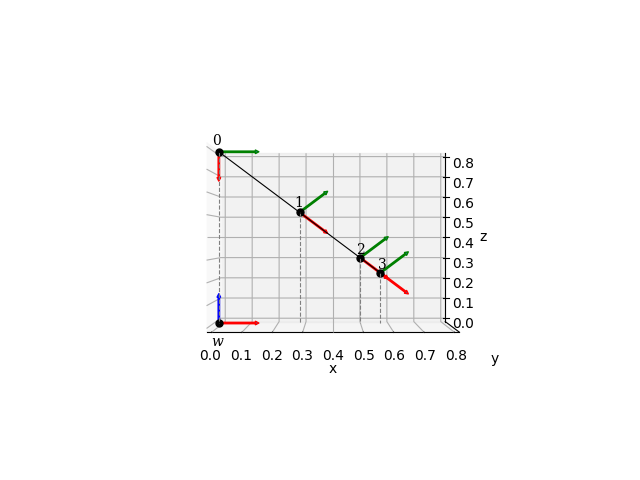

In [6]:
def calcTransformationAbs(H):
    absH = []
    for i in range (0,len(H)):
        if(i==0):
            H[i] = s.simplify(H[i])
            absH.append(H[i])
        else:
            absH_tmp = absH[i-1]*H[i]
            absH_tmp=s.simplify(absH_tmp)
            absH.append(absH_tmp)
    return absH

#absH[0] = H1_0
#absH[1] = H2_0
#absH[2] = H3_0
absH = calcTransformationAbs(relH)
# absH
def calcTransformationWorld(H0_w,H):
    wH = []
    for i in range(0,len(H)):
        wH_temp = H0_w*H[i]
        wH_temp = s.simplify(wH_temp)
        wH.append(wH_temp)
    return wH

#wH[0] = H1_w
#wH[1] = H2_w
#wH[2] = H3_w
wH = calcTransformationWorld(H0_w, absH)
# wH

# change the angles 
H_list=[]
H = s.lambdify((x),s.Matrix(H0_w),modules="numpy")
H_list.append(H(0))
for wH_ in wH:
    H = s.lambdify((q1,q2,q3,L1,L2,L3,pi),wH_,modules="numpy")
    q1_ = np.radians(45)
    q2_ = np.radians(0)
    q3_ = np.radians(0)
    H_list.append(H(q1_,q2_,q3_,L1_,L2_,L3_,np.pi))    

pu.plotTrans(H_list)


5. Plot your results with $q_1 = 45 ^{\circ}, q_2 = 0 ^{\circ}, q_3 = 0 ^{\circ}$. Your output should be the same as the first exercise. Try to change the joint angles, how does an elbow flexion look like? 

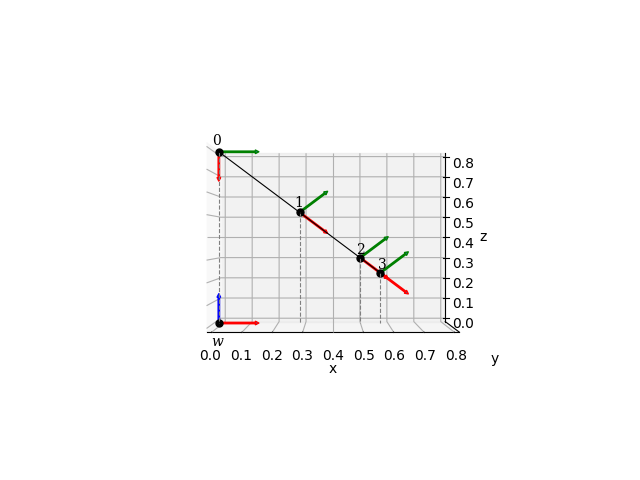

In [12]:
# change the angles 
H_list=[]
H = s.lambdify((x),s.Matrix(H0_w),modules="numpy")
H_list.append(H(0))
for wH_ in wH:
    H = s.lambdify((q1,q2,q3,L1,L2,L3,pi),wH_,modules="numpy")
    q1_ = np.deg2rad(45.0)
    q2_ = np.deg2rad(0.0)
    q3_ = np.deg2rad(0.0)
    H_list.append(H(q1_,q2_,q3_,L1_,L2_,L3_,np.pi))    

pu.plotTrans(H_list)

6. Create a function to calculate the orientation of a body in terms of euler angles (roll-pitch-yaw) from a rotation matrix

In [18]:
def R2EulerA(R):
    d = s.sqrt(1-R[2,0]**2)
    psi=s.atan2(R[2,1],R[2,2]) #x
    theta=s.atan2(-R[2,0],d)
    phi=s.atan2(R[1,0],R[0,0])
    
    return psi,theta,phi,d

7. Use forward kinematics to calculate the position of your hand (end-effector) with respect to the base and to the world given $q_1$, $q_1$, and $q_3$ 

In [32]:
psi,theta,phi,d = R2EulerA(absH[2][:3,:3])
Xef_0 = s.Matrix([d,psi,theta,phi])
Xef_0 = s.simplify(Xef_0)

psi,theta,phi,d = R2EulerA(wH[2][:3,:3])
Xef_w = s.Matrix([d,psi,theta,phi])
Xef_w = s.simplify(Xef_w)
# Xef_w

Xef_0


⎡                     1                     ⎤
⎢                                           ⎥
⎢                     0                     ⎥
⎢                                           ⎥
⎢                     0                     ⎥
⎢                                           ⎥
⎣atan2(sin(q₁ + q₂ + q₃), cos(q₁ + q₂ + q₃))⎦

8. Create sinusoidal waves for $q_1$, $q_1$, and $q_3$ of T=2s with the ROM of shoulder/elbow/wrist flexion and extension. Simulate for 4s. Plot your results

In [ ]:
f = 1/2
A_q1 = np.radians(180) / 2
A_q2 = #toDo
A_q3 = #toDo
B_q1 = #toDo
B_q2 = A_q2
B_q3 = -np.radians(20)

ticks = np.arange(0,#toDo,0.01)
q1_sim = A_q1*s.sin(#toDo*t) + B_q1
q1_sim = s.lambdify(t,q1_sim,modules=["numpy","math"])
q2_sim = #toDo
q2_sim = s.lambdify(t,q2_sim,modules=["numpy","math"])
q3_sim = #toDo
q3_sim = s.lambdify(t,q3_sim,modules=["numpy","math"])

In [ ]:
# install science plots https://pypi.org/project/SciencePlots/#description 
plt.close()
fig, ax = plt.subplots(figsize=(12,6), dpi= 80)
plt.style.use(['science','ieee'])
ax.plot(ticks,np.degrees(q1_sim(ticks)),label='q1')
ax.plot(ticks,np.degrees(q2_sim(ticks)),label='q2')
ax.plot(ticks,np.degrees(q3_sim(ticks)),label='q3')
ax.grid()
ax.set_xlim([0,4])
ax.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')
plt.tight_layout()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Angle [degrees]')
fig.savefig(str('sine.pdf'), format='pdf', bbox_inches='tight')

9. Calculate $X^{EF}_W$ for the joints $q_1$, $q_1$, and $q_3$ calculated in the last step. Plot your results

In [ ]:
x = #toDo Hint: use lambdify!
xef = []
for tick in ticks:
    xef.append(np.squeeze(x(q1_sim(tick),#toDo)))
xef = np.asarray(xef)

plt.style.use(['science','ieee'])
fig, ax = plt.subplots(figsize=(12,6), dpi= 80)
ax.plot(ticks,xef[:,0],label='x')
ax.plot(#toDo)
ax.plot(#toDo)
ax.grid()
ax.set_xlim([0,4])
ax.legend(loc=1,frameon=True,framealpha=1)
ax.set_xlabel('Time [s]')
ax.set_ylabel('distance [m]')
fig.savefig(str('xef.pdf'), format='pdf', bbox_inches='tight')

In [ ]:
# now let's plot it in 3D! no need to do anything here, can take a while to run, don't despair. 
plt.close()
plt.style.use('default')
H_lamb=[]
H = s.lambdify((q1,q2,q3,L1,L2,L3,pi),s.Matrix(H0_w),modules="numpy")
H_lamb.append(H)
for wH_ in wH:
    H = s.lambdify((q1,q2,q3,L1,L2,L3,pi),wH_,modules="numpy")
    H_lamb.append(H)

q1_ = q1_sim(ticks)
q2_ = q2_sim(ticks)
q3_ = q3_sim(ticks)

import matplotlib.animation as animation
from IPython.display import HTML
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim(0.0,0.8)
ax.set_ylim(-0.4,0.4)
ax.set_zlim(0,0.8)
ax.set_yticks([])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0,270)
arrow_length = 0.15
coords = []
#plot world coord-frame
lines = []
lines.append(ax.plot(0,0,0,'o',markersize=5,color='black')[0])
#coords.append([0,0,0])
ax.arrow3D(0,0,0,0,0,arrow_length,mutation_scale=5,ec ='blue')
ax.arrow3D(0,0,0,0,arrow_length,0,mutation_scale=5,ec ='green')
ax.arrow3D(0,0,0,arrow_length,0,0,mutation_scale=5,ec ='red')
ax.text(-0.02,-0.1,-0.1,'$w$',size=10, math_fontfamily='dejavuserif')

for i,Hlamb in enumerate(H_lamb):
    lines.append(ax.plot(0,0,0,'o',markersize=5,color='black')[0]) 
    H = Hlamb(q1_[0],q2_[0],q3_[0],L1_,L2_,L3_,np.pi)
    coords.append([H[0,3],H[1,3],H[2,3]])
    #lines.append(ax.arrow3D(H[0,3],H[1,3],H[2,3],x[0][0],x[1][0],x[2][0],mutation_scale=5,ec ='red'))
    #lines.append(ax.arrow3D(H[0,3],H[1,3],H[2,3],y[0][0],y[1][0],y[2][0],mutation_scale=5,ec ='green'))
    #lines.append(ax.arrow3D(H[0,3],H[1,3],H[2,3],z[0][0],z[1][0],z[2][0],mutation_scale=5,ec ='blue'))
    #ax.text(H[0,3]-0.015,H[1,3]-0.17,H[2,3]+0.09,'$'+str(i)+'$',color='black', size=10, math_fontfamily='dejavuserif')

    #ax.plot([H[0,3],0],[H[1,3],H[1,3]],[H[2,3],H[2,3]],linestyle='dashed',color='gray',linewidth='0.8') 
    #ax.plot([H[0,3],H[0,3]],[H[1,3],0],[H[2,3],H[2,3]],linestyle='dashed',color='gray',linewidth='0.8') 
    #lines.append(ax.plot([H[0,3],H[0,3]],[H[1,3],H[1,3]],[H[2,3],0],linestyle='dashed',color='gray',linewidth='0.8')) 
    
coords = np.asarray(coords)
lines.append(ax.plot(coords[:,0],coords[:,1],coords[:,2],linestyle='solid',color='black',linewidth='1')[0])

def update_lines(frame_num,l,H_lamb):
    coords = []
    ax.artists.clear()
    
    #coords.append([0,0,0])
    ax.arrow3D(0,0,0,0,0,arrow_length,mutation_scale=5,ec ='blue')
    ax.arrow3D(0,0,0,0,arrow_length,0,mutation_scale=5,ec ='green')
    ax.arrow3D(0,0,0,arrow_length,0,0,mutation_scale=5,ec ='red')
    
    for i,Hlamb in enumerate(H_lamb):
        H = Hlamb(q1_[frame_num],q2_[frame_num],q3_[frame_num],L1_,L2_,L3_,np.pi)

        #ax.plot(H[0,3],H[1,3],H[2,3],'o',markersize=5,color='black') 
        l[i+1].set_data(H[0,3],H[1,3])
        l[i+1].set_3d_properties(H[2,3])
        #print("hola")
        coords.append([H[0,3],H[1,3],H[2,3]])
        x = np.matmul(H[0:3,0:3],np.array([[arrow_length],[0],[0]]))
        y = np.matmul(H[0:3,0:3],np.array([[0],[arrow_length],[0]]))
        z = np.matmul(H[0:3,0:3],np.array([[0],[0],[arrow_length]]))
        
        
        ax.arrow3D(H[0,3],H[1,3],H[2,3],x[0][0],x[1][0],x[2][0],mutation_scale=5,ec ='red')
        ax.arrow3D(H[0,3],H[1,3],H[2,3],y[0][0],y[1][0],y[2][0],mutation_scale=5,ec ='green')
        ax.arrow3D(H[0,3],H[1,3],H[2,3],z[0][0],z[1][0],z[2][0],mutation_scale=5,ec ='blue')
        #ax.text(H[0,3]-0.015,H[1,3]-0.17,H[2,3]+0.09,'$'+str(i)+'$',color='black', size=10, math_fontfamily='dejavuserif')

        ##ax.plot([H[0,3],0],[H[1,3],H[1,3]],[H[2,3],H[2,3]],linestyle='dashed',color='gray',linewidth='0.8') 
        ##ax.plot([H[0,3],H[0,3]],[H[1,3],0],[H[2,3],H[2,3]],linestyle='dashed',color='gray',linewidth='0.8') 
        #ax.plot([H[0,3],H[0,3]],[H[1,3],H[1,3]],[H[2,3],0],linestyle='dashed',color='gray',linewidth='0.8')
    
    coords = np.asarray(coords)
    l[i+2].set_data(coords[:,0],coords[:,1])
    l[i+2].set_3d_properties(coords[:,2])
    
    return l

ani = animation.FuncAnimation(fig, update_lines, fargs=(lines,H_lamb), frames = np.size(ticks), interval = 50, blit=False)
plt.close()
HTML(ani.to_jshtml())
